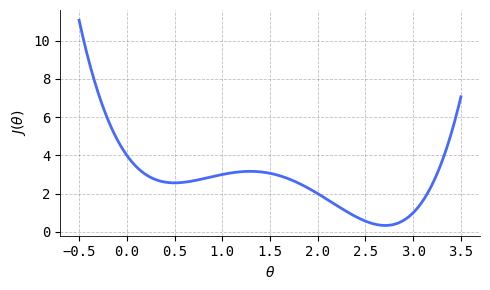

In [1]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math_stats_ml.gd import GD, SGD, plot_gd, plot_sgd
#import matplotlib_inline.backend_inline
plt.style.use('./aux-files/custom_style_light.mplstyle')
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
blue = '#486AFB'
magenta = '#FD46FC'

def J(theta):
    return (theta ** 4) - 6 * (theta ** 3) + 11 * (theta ** 2) - 7 * theta + 4

grid = torch.linspace(start=-0.5, end=3.5, steps=300)
plt.plot(grid, J(grid))
plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
#plt.savefig('/Users/johnmyers/Desktop/poly-obj.pdf')

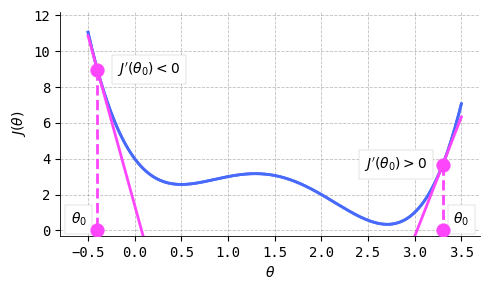

In [2]:
def J_prime(theta):
    return 4 * (theta ** 3) - 18 * (theta ** 2) + 22 * theta - 7

plt.plot(grid, J(grid), color=blue)
plt.plot(grid, J_prime(-0.4) * (grid + 0.4) + J(-0.4), color=magenta, zorder=10)
plt.scatter(-0.4, J(-0.4), color=magenta, s=100, zorder=15)
plt.scatter(-0.4, 0, color=magenta, s=100, zorder=20)
plt.plot([-0.4, -0.4], [J(-0.4), 0], color=magenta, linestyle='--')

plt.plot(grid, J(grid))
plt.plot(grid, J_prime(3.3) * (grid - 3.3) + J(3.3))
plt.scatter(3.3, J(3.3), color=magenta, s=100, zorder=10)
plt.scatter(3.3, 0, color=magenta, s=100, zorder=10)
plt.plot([3.3, 3.3], [J(3.3), 0], color=magenta, linestyle='--')

plt.text(-0.6, 0.6, '$\\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(0.15, J(-0.4), "$J'(\\theta_0)<0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(3.5, 0.6, '$\\theta_0$', ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
plt.text(2.8, J(3.3), "$J'(\\theta_0)>0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))

plt.xlim(-0.8, 3.7)
plt.ylim(-0.3, 12.2)
plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
#plt.savefig('/Users/johnmyers/Desktop/tan-line.pdf')

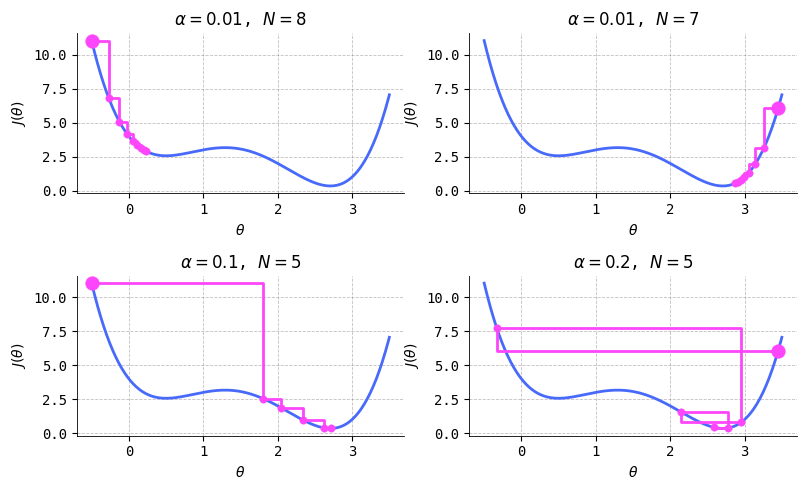

In [3]:
gd_parameters = {'init_parameters': [torch.tensor([-0.5]),
                                     torch.tensor([3.45]),
                                     torch.tensor([-0.5]),
                                     torch.tensor([3.45])],
                 'num_steps': [8, 7, 5, 5],
                 'lr': [1e-2, 1e-2, 1e-1, 2e-1]}

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
grid = torch.linspace(start=-0.5, end=3.5, steps=300)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J)
    
    alpha = gd_parameters_slice['lr']
    N = gd_parameters_slice['num_steps']
    thetas = gd_output.parameters['theta']
    
    axis.plot(grid, J(grid))
    axis.step(x=thetas, y=gd_output.per_step_objectives, where='post', color=magenta, zorder=2)
    axis.scatter(x=thetas, y=gd_output.per_step_objectives, s=30, color=magenta, zorder=2)
    axis.scatter(x=thetas[0], y=gd_output.per_step_objectives[0], s=100, color=magenta, zorder=2)
    axis.set_xlabel('$\\theta$')
    axis.set_ylabel('$J(\\theta)$')
    axis.set_title(f'$\\alpha={alpha}$, $N={N}$')
plt.tight_layout()
#plt.savefig('/Users/johnmyers/Desktop/single-var-gd.pdf')

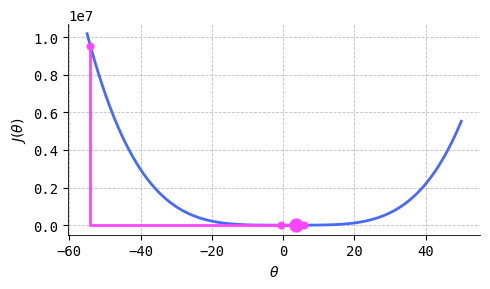

In [4]:
gd_output = GD(J=J, init_parameters=torch.tensor([3.5]), lr=2e-1, num_steps=3)
thetas = gd_output.parameters['theta']

grid = torch.linspace(start=-55, end=50, steps=300)
plt.plot(grid, J(grid))
plt.step(x=thetas, y=gd_output.per_step_objectives, where='post', color=magenta, zorder=2)
plt.scatter(x=thetas, y=gd_output.per_step_objectives, s=30, color=magenta, zorder=2)
plt.scatter(x=thetas[0], y=gd_output.per_step_objectives[0], s=100, color=magenta, zorder=2)

plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
#plt.savefig('/Users/johnmyers/Desktop/diverge.pdf')

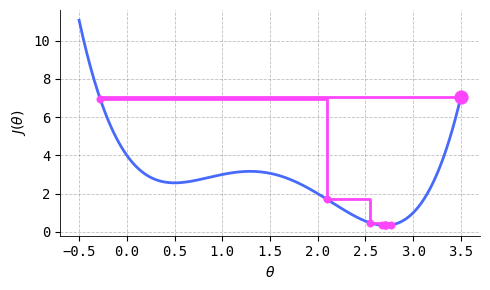

In [5]:
gd_output = GD(J=J, init_parameters=torch.tensor([3.5]), lr=2e-1, num_steps=8, decay_rate=0.1)
thetas = gd_output.parameters['theta']

grid = torch.linspace(start=-0.5, end=3.5, steps=300)
plt.plot(grid, J(grid))
plt.step(x=thetas, y=gd_output.per_step_objectives, where='post', color=magenta, zorder=2)
plt.scatter(x=thetas, y=gd_output.per_step_objectives, s=30, color=magenta, zorder=2)
plt.scatter(x=thetas[0], y=gd_output.per_step_objectives[0], s=100, color=magenta, zorder=2)

plt.xlabel('$\\theta$')
plt.ylabel('$J(\\theta)$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()
#plt.savefig('/Users/johnmyers/Desktop/decay-converge.pdf')

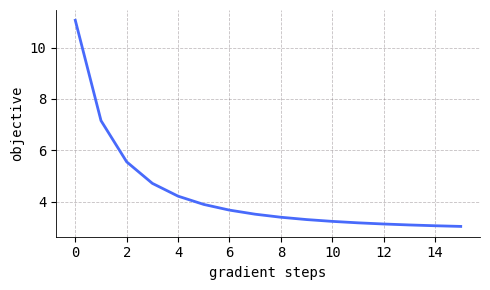

In [6]:
gd_output = GD(J=J, init_parameters=torch.tensor([-0.5]), lr=1e-2, num_steps=15, decay_rate=0.1)
plot_gd(gd_output, h=3, plot_title=False, parameter_title=False, ylabel='objective')
plt.tight_layout()
#plt.savefig('/Users/johnmyers/Desktop/obj-steps-single-var.pdf')

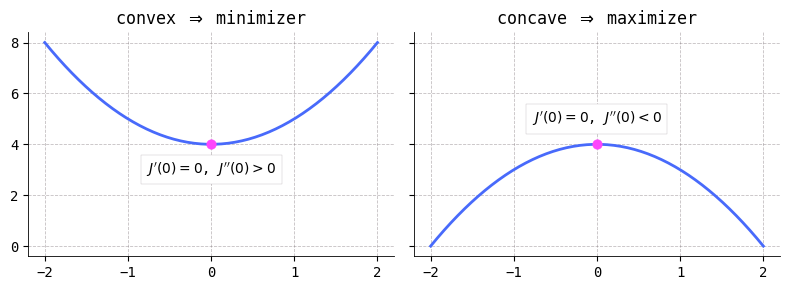

In [7]:
def f(x):
    return x ** 2 + 4

def g(x):
    return -x ** 2 + 4

functions = [f, g]
grid = np.linspace(-2, 2)
_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True, sharex=True)

for i, (function, axis) in enumerate(zip(functions, axes)):
    axis.plot(grid, function(grid))
    axis.scatter(0, 4, s=50, color=magenta, zorder=3)
    if i == 0:
        axis.text(0, 3, "$J '(0) = 0$, $J ''(0)>0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
        axis.set_title('convex $\Rightarrow$ minimizer')
    else:
        axis.text(0, 5, "$J '(0) = 0$, $J ''(0)<0$", ha='center', va='center', bbox=dict(facecolor='white', edgecolor=None))
        axis.set_title('concave $\Rightarrow$ maximizer')

plt.tight_layout()

#plt.savefig('/Users/johnmyers/Desktop/convex-concave.pdf')

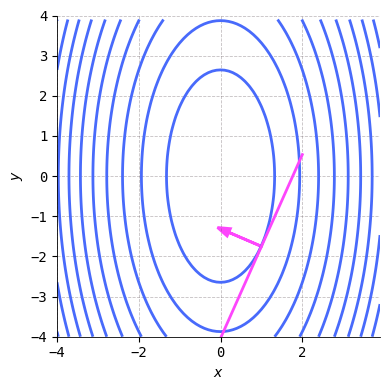

In [8]:
def f(x, y):
    return -4 * x ** 2 - y ** 2 + 15

grid = np.linspace(0, 2)
x, y = np.mgrid[-4:4:0.1, -4:4:0.1]
z = f(x, y)

def tangent_line(x):
    return (8 / 3.5) * (x - 1) - 1.75

plt.contour(x, y, z, levels=10, colors=blue, linestyles='solid')
plt.plot(grid, tangent_line(grid), color=magenta)
plt.arrow(1, -1.75, -8 / 10, 3.5 / 10, head_width=0.2, head_length=0.3, fc=magenta, ec=magenta, linewidth=2)
plt.gcf().set_size_inches(4, 4)
plt.ylim(-4, 4)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()

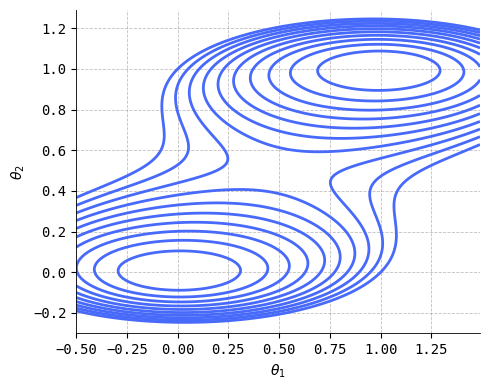

In [9]:
def J(theta):
    theta1 = theta[0]
    theta2 = theta[1]
    return (theta1 ** 2 + 10 * theta2 ** 2) * ((theta1 - 1) ** 2 + 10 * (theta2 - 1) ** 2)

x, y = np.mgrid[-0.50:1.5:0.01, -0.3:1.3:0.01]
grid = np.dstack((x, y))
z = np.apply_along_axis(J, axis=-1, arr=grid)

plt.contour(x, y, z, levels=range(11), colors=blue)
plt.xlabel('$\\theta_1$')
plt.ylabel('$\\theta_2$')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

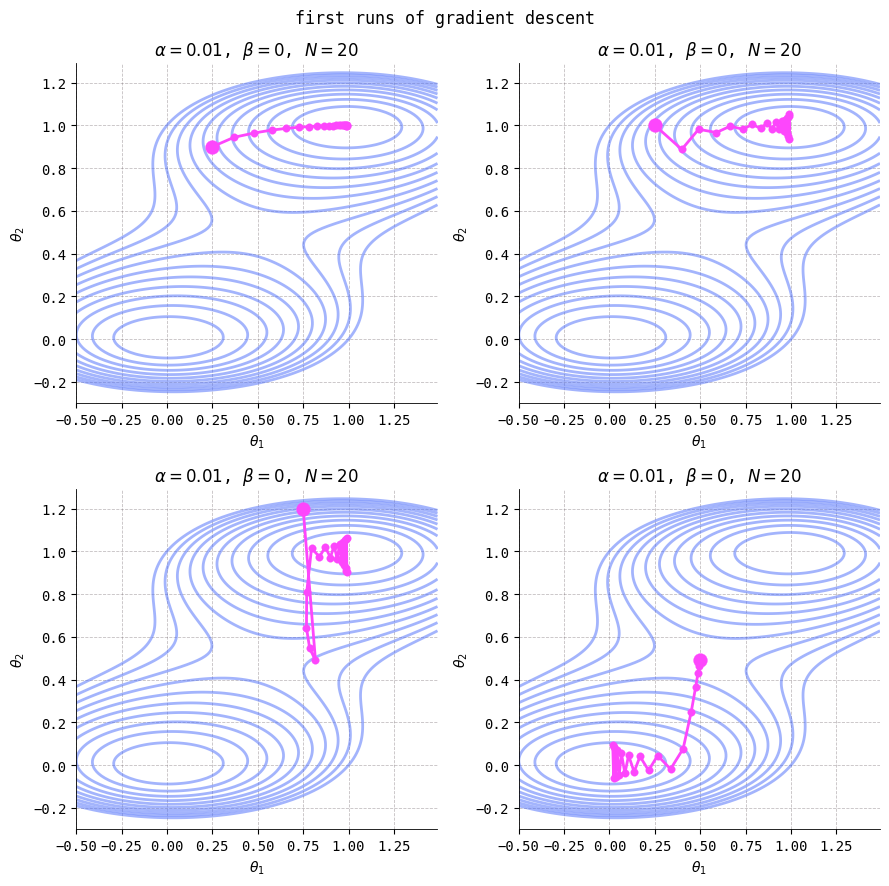

In [10]:
gd_parameters = {'init_parameters': [torch.tensor([0.25, 0.9]),
                                     torch.tensor([0.25, 1]),
                                     torch.tensor([0.75, 1.2]),
                                     torch.tensor([0.5, 0.49])]}
alpha = 1e-2
beta = 0
N = 20

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(J=J,
                   lr=alpha,
                   num_steps=N,
                   decay_rate=beta,
                   **gd_parameters_slice)
    thetas = gd_output.parameters['theta']
        
    axis.contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
    axis.plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axis.scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(x=thetas[0, 0], y=thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
    axis.set_title(f'$\\alpha={alpha}$, $\\beta={beta}$, $N={N}$')
fig.suptitle('first runs of gradient descent')
plt.tight_layout()

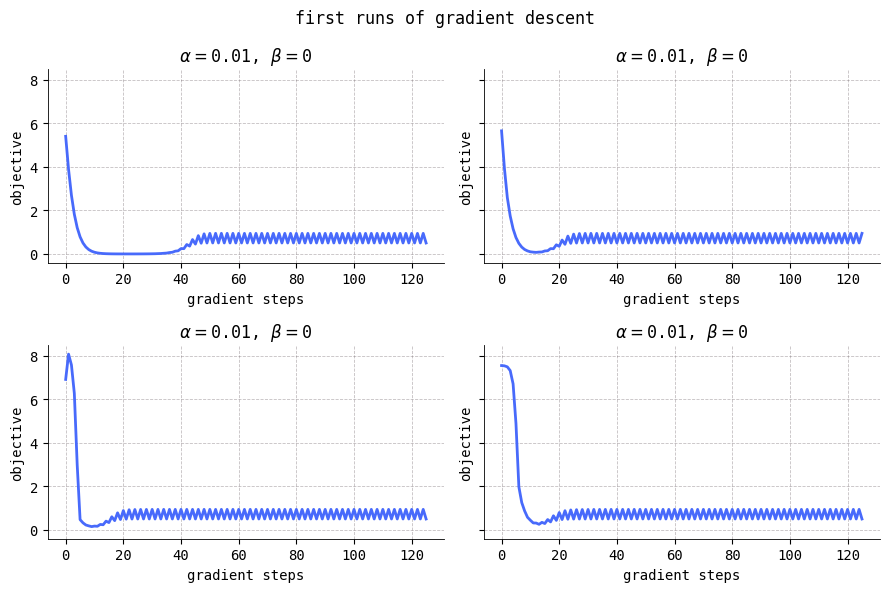

In [11]:
gd_parameters = {'init_parameters': [torch.tensor([0.25, 0.9]),
                                     torch.tensor([0.25, 1]),
                                     torch.tensor([0.75, 1.2]),
                                     torch.tensor([0.5, 0.49])]}
alpha = 1e-2
beta = 0
N = 125

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(J=J,
                   lr=alpha,
                   num_steps=N,
                   decay_rate=beta,
                   **gd_parameters_slice)
    plot_gd(gd_output=gd_output, ylabel='objective', ax=axis, plot_title=False)
fig.suptitle('first runs of gradient descent')
plt.tight_layout()

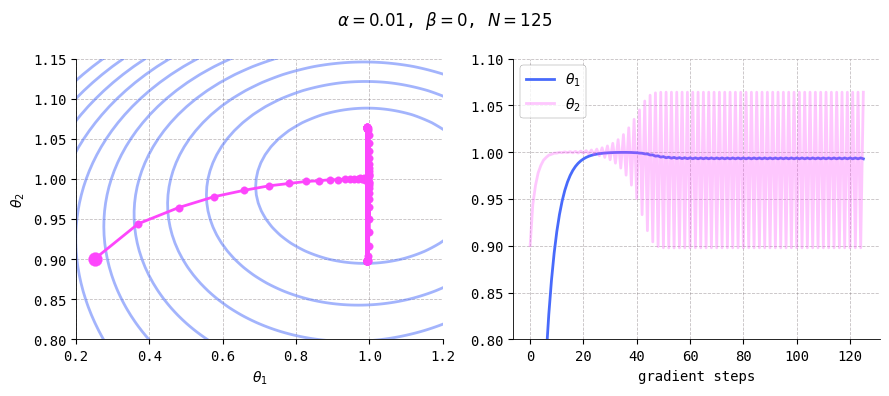

In [12]:
theta0 = torch.tensor([0.25, 0.9])
alpha = 1e-2
beta = 0
N = 125
gd_output = GD(J=J, init_parameters=theta0, lr=alpha, num_steps=N, decay_rate=beta)
thetas = gd_output.parameters['theta']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

axes[0].contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
axes[0].plot(thetas[:, 0], thetas[:, 1], color=magenta)
axes[0].scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
axes[0].scatter(x=thetas[0, 0], y=thetas[0, 1], s=100, color=magenta, zorder=2)
axes[0].set_xlabel('$\\theta_1$')
axes[0].set_ylabel('$\\theta_2$')
axes[0].set_xlim(0.2, 1.2)
axes[0].set_ylim(0.8, 1.15)

axes[1].plot(range(len(gd_output.per_step_objectives)), thetas[:, 0], label='$\\theta_1$')
axes[1].plot(range(len(gd_output.per_step_objectives)), thetas[:, 1], alpha=0.3, label='$\\theta_2$')
axes[1].set_xlabel('gradient steps')
axes[1].set_ylim(0.8, 1.1)
axes[1].legend()

fig.suptitle(f'$\\alpha={alpha}$, $\\beta={beta}$, $N={N}$')
plt.tight_layout()

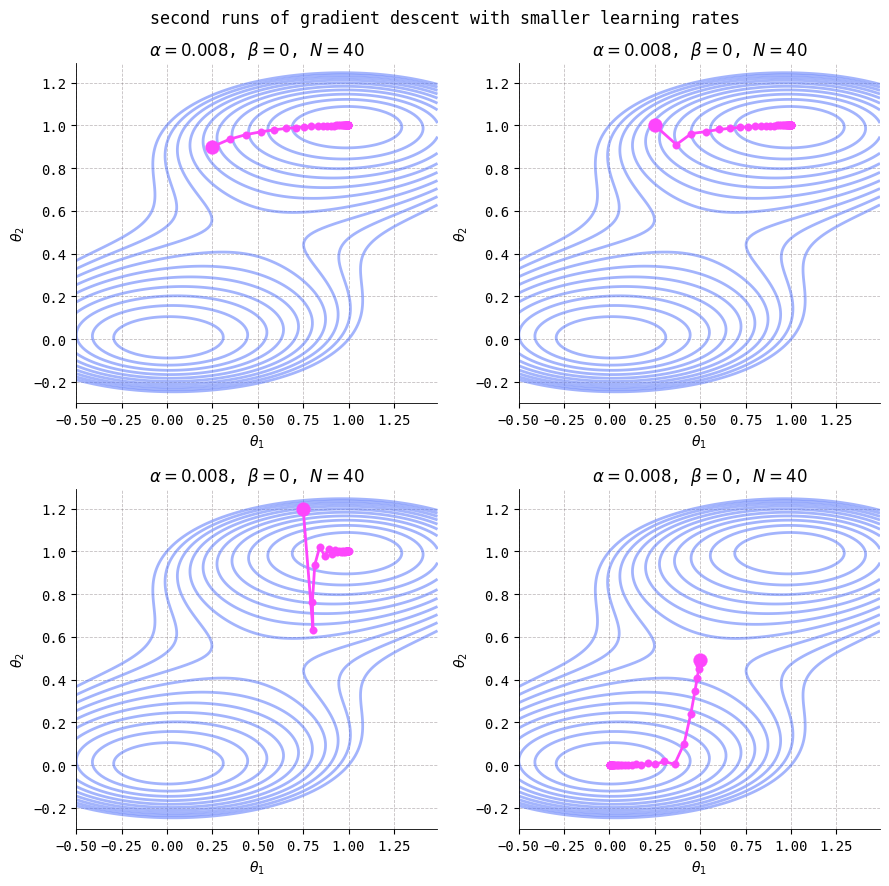

In [13]:
gd_parameters = {'init_parameters': [torch.tensor([0.25, 0.9]),
                                     torch.tensor([0.25, 1]),
                                     torch.tensor([0.75, 1.2]),
                                     torch.tensor([0.5, 0.49])]}
alpha = 8e-3
beta = 0
N = 40

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(J=J,
                   lr=alpha,
                   num_steps=N,
                   decay_rate=beta,
                   **gd_parameters_slice)
    thetas = gd_output.parameters['theta']
    
    axis.contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
    axis.plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axis.scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(x=thetas[0, 0], y=thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
    axis.set_title(f'$\\alpha={alpha}$, $\\beta={beta}$, $N={N}$')
fig.suptitle('second runs of gradient descent with smaller learning rates')
plt.tight_layout()

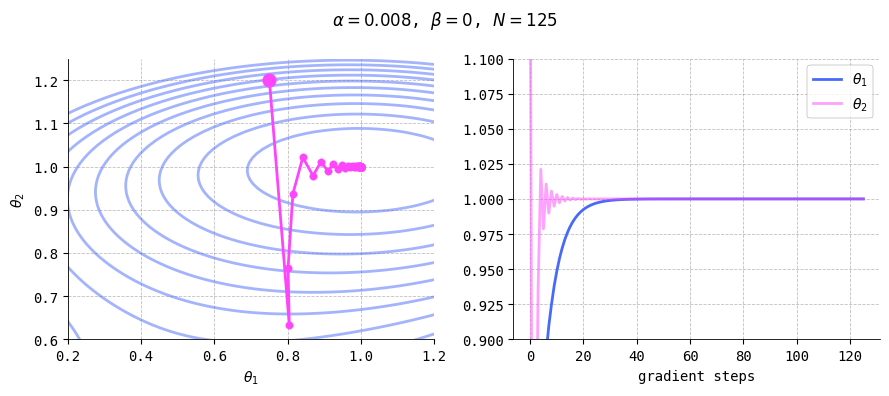

In [14]:
theta0 = torch.tensor([0.75, 1.2])
alpha = 8e-3
beta = 0
N = 125
gd_output = GD(J=J, init_parameters=theta0, lr=alpha, num_steps=N, decay_rate=beta)
thetas = gd_output.parameters['theta']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

axes[0].contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
axes[0].plot(thetas[:, 0], thetas[:, 1], color=magenta)
axes[0].scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
axes[0].scatter(x=thetas[0, 0], y=thetas[0, 1], s=100, color=magenta, zorder=2)
axes[0].set_xlabel('$\\theta_1$')
axes[0].set_ylabel('$\\theta_2$')
axes[0].set_xlim(0.2, 1.2)
axes[0].set_ylim(0.6, 1.25)

axes[1].plot(range(len(gd_output.per_step_objectives)), thetas[:, 0], label='$\\theta_1$')
axes[1].plot(range(len(gd_output.per_step_objectives)), thetas[:, 1], alpha=0.5, label='$\\theta_2$')
axes[1].set_xlabel('gradient steps')
axes[1].set_ylim(0.9, 1.1)
axes[1].legend()

fig.suptitle(f'$\\alpha={alpha}$, $\\beta={beta}$, $N={N}$')
plt.tight_layout()

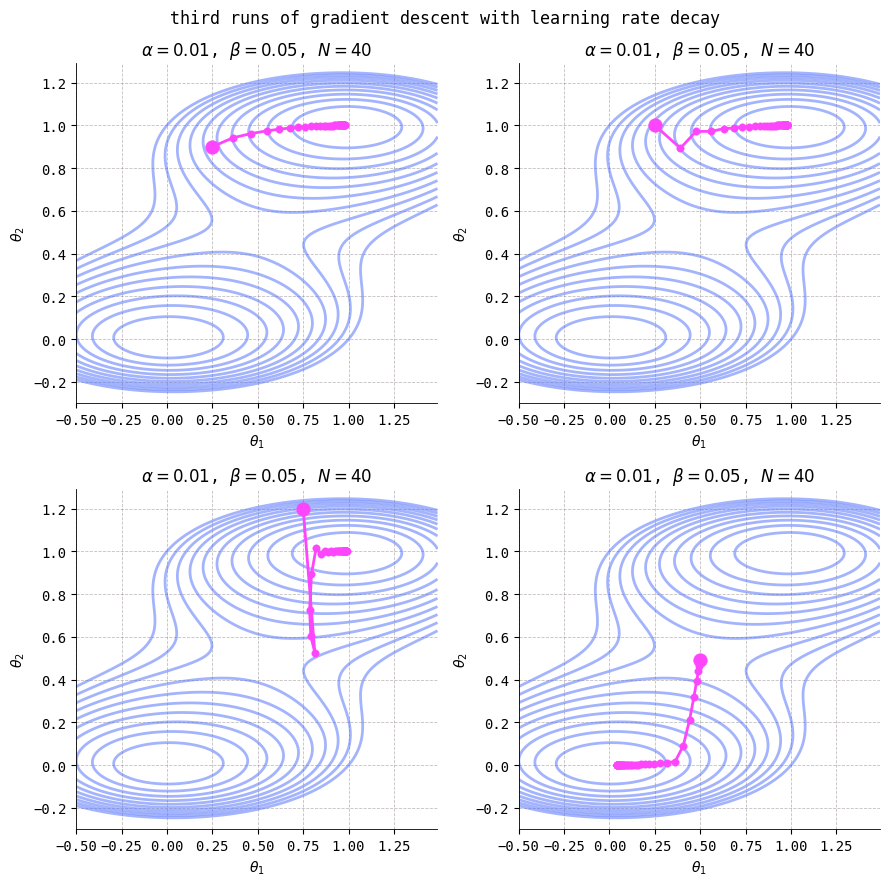

In [15]:
gd_parameters = {'init_parameters': [torch.tensor([0.25, 0.9]),
                                     torch.tensor([0.25, 1]),
                                     torch.tensor([0.75, 1.2]),
                                     torch.tensor([0.5, 0.49])]}
alpha = 1e-2
N = 40
beta = 0.05

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(J=J,
                   lr=alpha,
                   num_steps=N,
                   decay_rate=beta,
                   **gd_parameters_slice)
    thetas = gd_output.parameters['theta']

    axis.contour(x, y, z, levels=range(11), colors=blue, alpha=0.5)
    axis.plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axis.scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(x=thetas[0, 0], y=thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
    axis.set_title(f'$\\alpha={alpha}$, $\\beta={beta}$, $N={N}$')
fig.suptitle('third runs of gradient descent with learning rate decay')
plt.tight_layout()

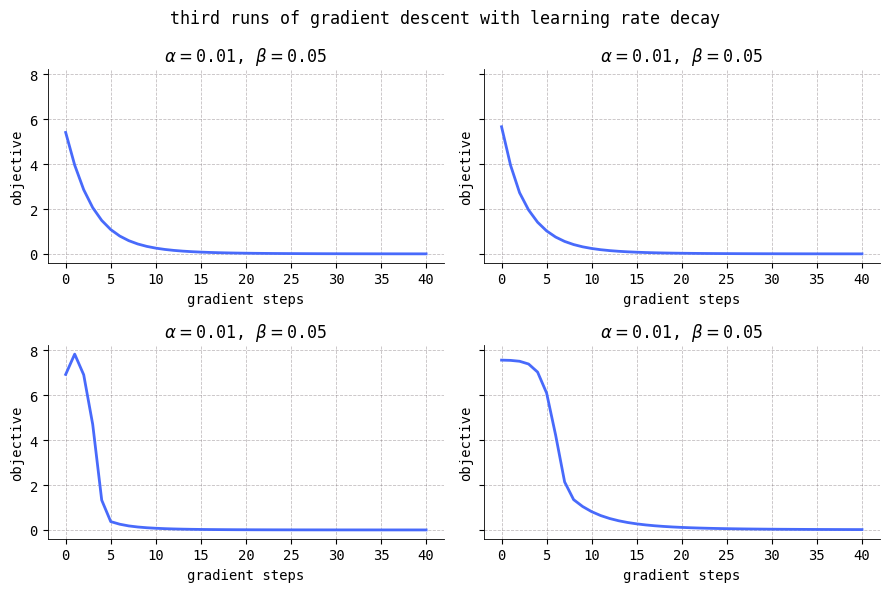

In [16]:
gd_parameters = {'init_parameters': [torch.tensor([0.25, 0.9]),
                                     torch.tensor([0.25, 1]),
                                     torch.tensor([0.75, 1.2]),
                                     torch.tensor([0.5, 0.49])]}
alpha = 1e-2
N = 40
beta = 0.05

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(J=J,
                   lr=alpha,
                   num_steps=N,
                   decay_rate=beta,
                   **gd_parameters_slice)
    plot_gd(gd_output=gd_output, ylabel='objective', ax=axis, plot_title=False)
fig.suptitle('third runs of gradient descent with learning rate decay')
plt.tight_layout()

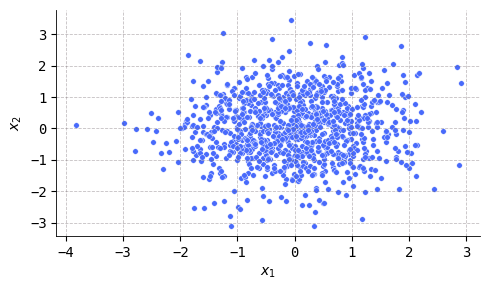

In [17]:
torch.manual_seed(42)
X = MultivariateNormal(loc=torch.zeros(2), covariance_matrix=torch.eye(2)).sample(sample_shape=(1024,))

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

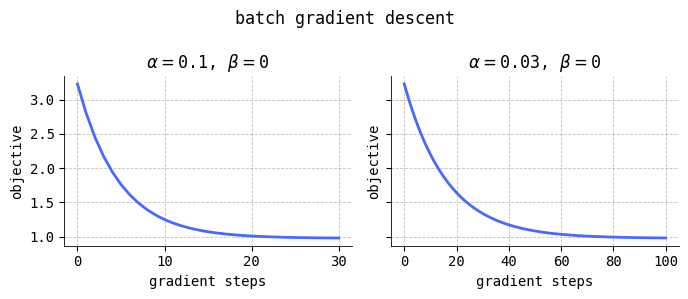

In [18]:
# define the target function
def g(theta, x):
    return 0.5 * torch.linalg.norm(x - theta, dim=1) ** 2

# define the objective function
def J(theta):
    return g(theta, X).mean()

gd_parameters = {'num_steps': [30, 100],
                 'lr': [1e-1, 3e-2]}
theta0 = torch.tensor([1.5, 1.5])
beta = 0

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3), sharey=True)

for i, axis in enumerate(axes):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J, decay_rate=beta, init_parameters=theta0)
    plot_gd(gd_output=gd_output, ylabel='objective', ax=axis, plot_title=False)
fig.suptitle('batch gradient descent')
plt.tight_layout()

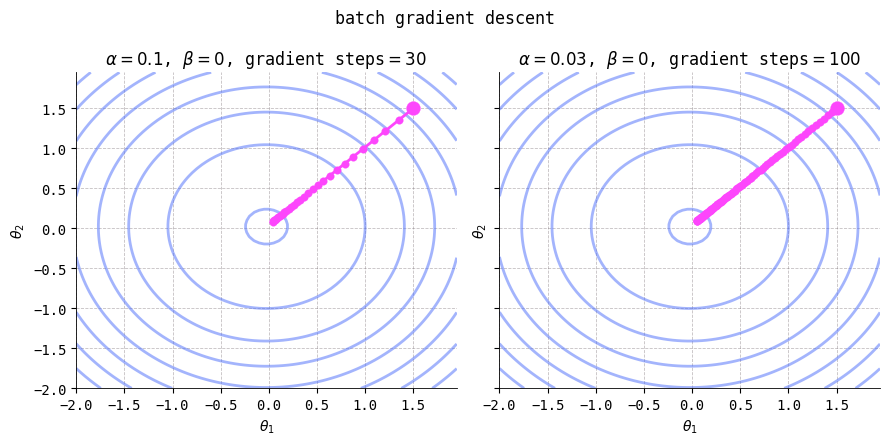

In [19]:
x, y = np.mgrid[-2:2:0.05, -2:2:0.05]
grid = np.dstack((x, y))
z = np.apply_along_axis(J, axis=-1, arr=grid)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4.5), sharey=True)

for i, axis in enumerate(axes):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    gd_output = GD(**gd_parameters_slice, J=J, decay_rate=beta, init_parameters=theta0)
    thetas = gd_output.parameters['theta']
    
    alpha = gd_parameters_slice['lr']
    N = gd_parameters_slice['num_steps']
    
    axis.contour(x, y, z, colors=blue, alpha=0.5, levels=np.arange(0, 10, 0.5))
    axis.plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axis.scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(thetas[0, 0], thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_title(f'$\\alpha={alpha}$, $\\beta={beta}$, gradient steps$={N}$')
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
fig.suptitle('batch gradient descent')
plt.tight_layout()

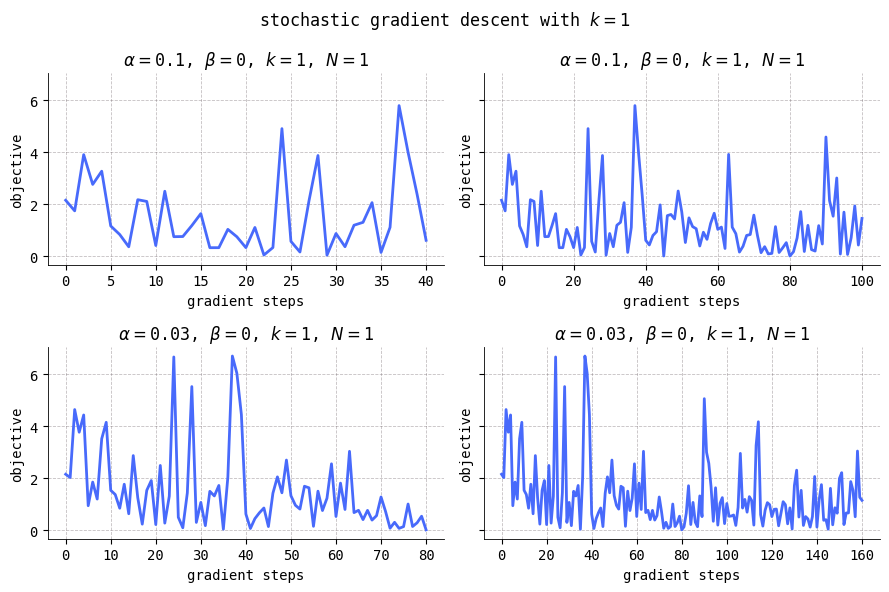

In [20]:
gd_parameters = {'lr': [1e-1, 1e-1, 3e-2, 3e-2],
                 'max_steps': [40, 100, 80, 160]}
beta = 0
theta0 = torch.tensor([1.5, 1.5])
k = 1
N = 1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    sgd_output = SGD(**gd_parameters_slice,
                    g=g,
                    X=X,
                    init_parameters=theta0,
                    batch_size=k,
                    decay_rate=beta,
                    num_epochs=N,
                    random_state=42)
    plot_sgd(sgd_output, plot_title=False, ax=axis, show_epoch=False, per_step_alpha=1, legend=False, ylabel='objective')
fig.suptitle(f'stochastic gradient descent with $k=1$')
plt.tight_layout()

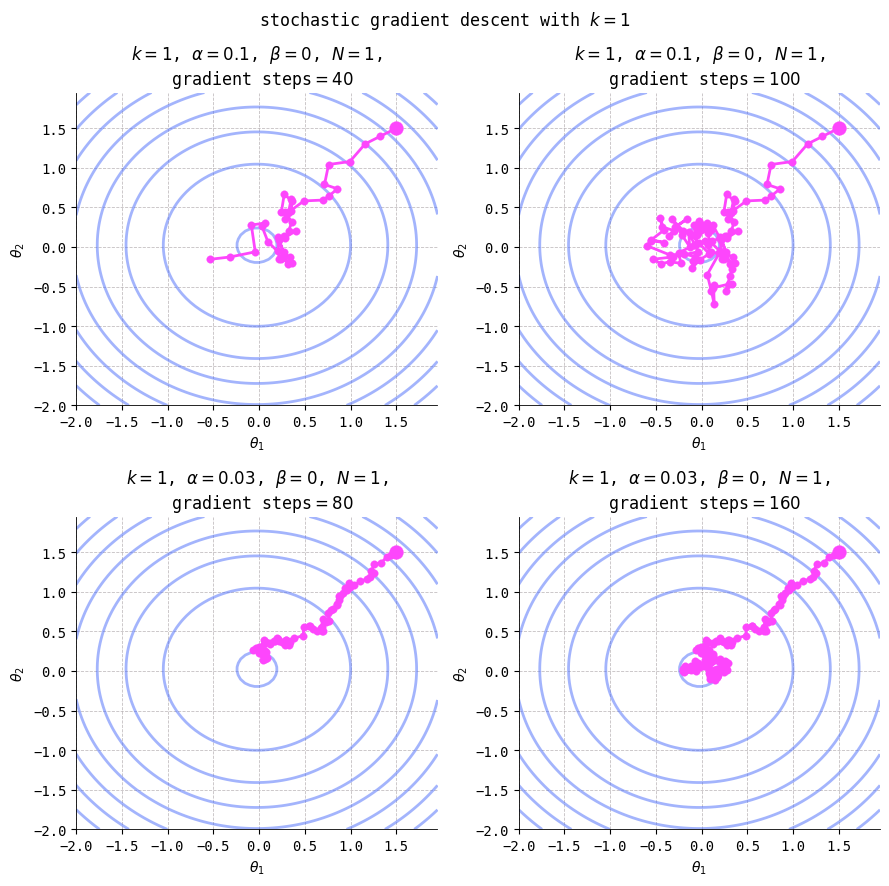

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    sgd_output = SGD(**gd_parameters_slice,
                    g=g,
                    X=X,
                    init_parameters=theta0,
                    batch_size=k,
                    decay_rate=beta,
                    num_epochs=N,
                    random_state=42)
    
    alpha = gd_parameters_slice['lr']
    max_steps = gd_parameters_slice['max_steps']
    thetas = sgd_output.parameters['theta']
    
    axis.contour(x, y, z, levels=np.arange(0, 10, 0.5), colors=blue, alpha=0.5)
    axis.plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axis.scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(thetas[0, 0], thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_title(f'$k={k}$, $\\alpha={alpha}$, $\\beta={beta}$, $N={N}$,\n gradient steps$={max_steps}$')
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
fig.suptitle(f'stochastic gradient descent with $k=1$')
plt.tight_layout()

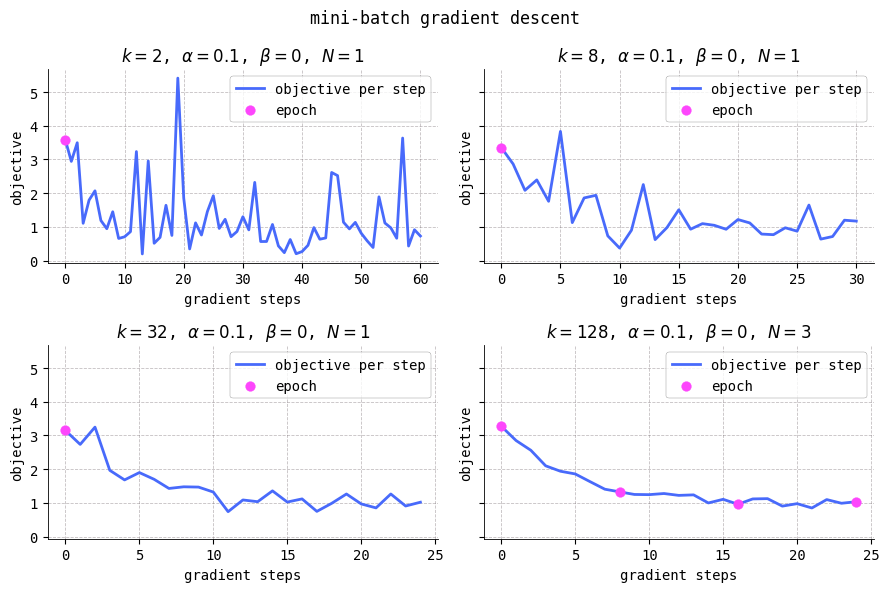

In [22]:
gd_parameters = {'num_epochs': [1, 1, 1, 3],
                 'batch_size': [2, 8, 32, 128],
                 'max_steps': [60, 30, 24, 24]}
alpha = 1e-1
beta = 0
theta0 = torch.tensor([1.5, 1.5])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    sgd_output = SGD(**gd_parameters_slice,
                    g=g,
                    X=X,
                    lr=alpha,
                    init_parameters=theta0,
                    decay_rate=beta,
                    random_state=42)
    
    k = gd_parameters_slice['batch_size']
    N = gd_parameters_slice['num_epochs']
    
    plot_sgd(sgd_output, plot_title=False, ax=axis, show_epoch=False, per_step_alpha=1, legend=False, ylabel='objective', per_step_label='objective per step')
    #axis.plot(range(len(sgd_output.per_step_objectives)), sgd_output.per_step_objectives)
    axis.scatter(sgd_output.epoch_step_nums, sgd_output.per_step_objectives[sgd_output.epoch_step_nums], color=magenta, s=50, zorder=2, label='epoch')
    axis.set_xlabel('gradient steps')
    axis.set_ylabel('objective')
    axis.set_title(f'$k={k}$, $\\alpha={alpha}$, $\\beta={beta}$, $N={N}$')
    axis.legend()
fig.suptitle('mini-batch gradient descent')
plt.tight_layout()

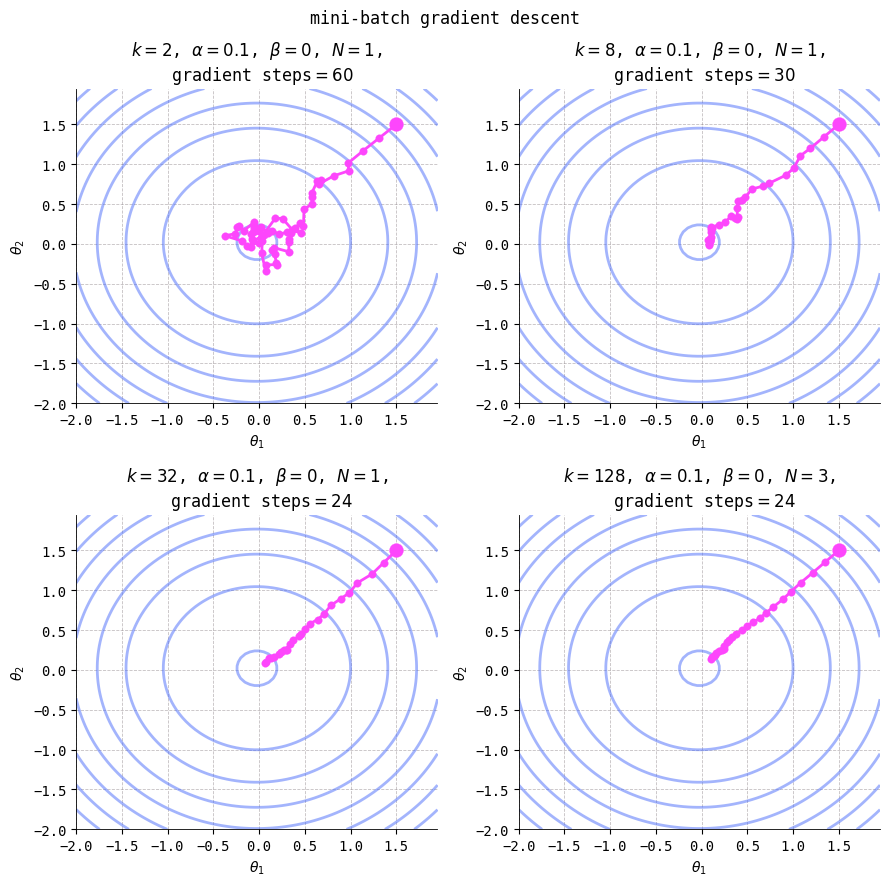

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    sgd_output = SGD(**gd_parameters_slice,
                    g=g,
                    X=X,
                    lr=alpha,
                    decay_rate=beta,
                    init_parameters=theta0,
                    random_state=42)
    
    k = gd_parameters_slice['batch_size']
    max_steps = gd_parameters_slice['max_steps']
    N = gd_parameters_slice['num_epochs']
    thetas = sgd_output.parameters['theta']
    
    axis.contour(x, y, z, levels=np.arange(0, 10, 0.5), colors=blue, alpha=0.5)
    axis.plot(thetas[:, 0], thetas[:, 1], color=magenta)
    axis.scatter(thetas[:, 0], thetas[:, 1], s=30, color=magenta, zorder=2)
    axis.scatter(thetas[0, 0], thetas[0, 1], s=100, color=magenta, zorder=2)
    
    axis.set_title(f'$k={k}$, $\\alpha={alpha}$, $\\beta={beta}$, $N={N}$,\n gradient steps$={max_steps}$')
    axis.set_xlabel('$\\theta_1$')
    axis.set_ylabel('$\\theta_2$')
fig.suptitle('mini-batch gradient descent')
plt.tight_layout()

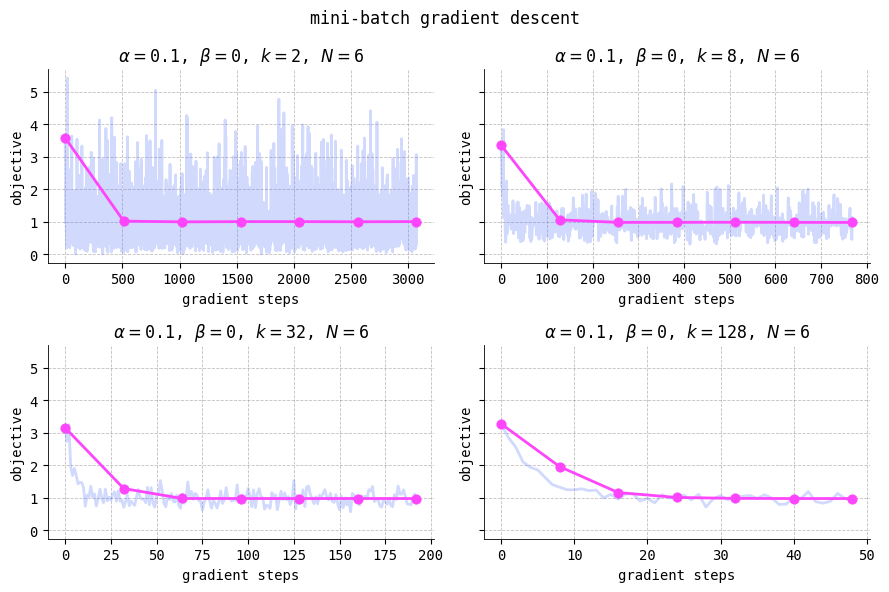

In [24]:
gd_parameters = {'batch_size': [2, 8, 32, 128]}
N = 6
alpha = 1e-1
beta = 0
theta0 = torch.tensor([1.5, 1.5])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 6), sharey=True)

for i, axis in enumerate(axes.flatten()):
    gd_parameters_slice = {key: value[i] for key, value in gd_parameters.items()}
    sgd_output = SGD(**gd_parameters_slice,
                    g=g,
                    X=X,
                    lr=alpha,
                    init_parameters=theta0,
                    num_epochs=N,
                    decay_rate=beta,
                    random_state=42)
    plot_sgd(sgd_output,
             plot_title=False,
             ax=axis,
             per_step_alpha=0.25,
             s=50,
             ylabel='objective',
             per_epoch_color=magenta,
             per_step_label='objective per step',
             per_epoch_label='mean objective per epoch')
fig.suptitle('mini-batch gradient descent')
plt.tight_layout()